# <div align="center">Observables of the TFIM in one Dimension</div>

Different Observables of the one-dimensional TFIM are calculated in the following.

In [1]:
# import self-made MPS/MPO functions
from MPSfunc_lib import *

## Part 1: Magnetization

In [2]:
'''calculate magnetization for different parameter J/beta for different N'''

# if long=True: calculate longitudinal antimagnetization
# if long=False: calculate transversal magnetization
def calcMagnBehaviour(N, long, J, beta, exact):
    #determine magnetization operator as MPO
    M = getMagnet(N, long)

    #step size adaption
    dt0 = 0.4
    eps_dt = 0.09

    dt_red = 0.8
    eps_tol = 1e-3
    phys_gap = 1e-3

    #truncation
    eps_trunc = 1e-4
    Dmax = 10
    bdim_start = 2
    
    x = []
    magnetization = []

    #calculate magnetization expectation value for different values of J by
    #determining first the corresponding groundstate MPS
    for i in range(len(J)):
        if(exact):
            E0, groundstate = gs_from_exact_diag(N, J[i], beta[i])
            magnetization.append(getMagnetExpValFromState(N, groundstate, long))
        else:
            conf = ImagiTime_config(N=N, J=J[i], beta=beta[i], dt0=dt0, eps_trunc=eps_trunc, Dmax=Dmax, eps_dt=eps_dt, dt_red=dt_red, eps_tol=eps_tol, phys_gap=phys_gap, bdim_start=bdim_start)
            time_stamp = datetime.now().strftime("%y%m%d%H%M%S")
            E0, E, groundstate = getGroundstate(conf, time_stamp)
            magnetization.append(get_exp_val_mpo(groundstate, M)/(-1)/N)
        x.append(J[i]/beta[i])
    return x, magnetization;

In [8]:
'''Parameters'''
Ns = [2]
J = np.linspace(0, 4, 30)
beta = np.full(len(J), 1)

### Longitudinal Antimagnetization

In [4]:
#calculate longitudinal antimagnetization
longMag = True

antimag = []
x1 = []

#calculate magnetization from program
for i in range(len(Ns)):
    print("N:", Ns[i])
    a, b = calcMagnBehaviour(Ns[i], longMag, J, beta, False)
    x1.append(a)
    antimag.append(b)  

N: 2
Iteration steps: 19
Energy ground state:   -1.9999999999
Extrapolated ground state energy: -2.000000

Iteration steps: 77
Energy ground state:   -2.0047503442
Extrapolated ground state energy: -2.004751

Iteration steps: 89
Energy ground state:   -2.0189342732
Extrapolated ground state energy: -2.018935

Iteration steps: 97
Energy ground state:   -2.0423551203
Extrapolated ground state energy: -2.042358

Iteration steps: 103
Energy ground state:   -2.0746998689
Extrapolated ground state energy: -2.074705

Iteration steps: 108
Energy ground state:   -2.1155589352
Extrapolated ground state energy: -2.115567

Iteration steps: 109
Energy ground state:   -2.1644497846
Extrapolated ground state energy: -2.164463

Iteration steps: 109
Energy ground state:   -2.2208415329
Extrapolated ground state energy: -2.220861

Iteration steps: 110
Energy ground state:   -2.2841781102
Extrapolated ground state energy: -2.284206

Iteration steps: 112
Energy ground state:   -2.3538983094
Extrapolated g

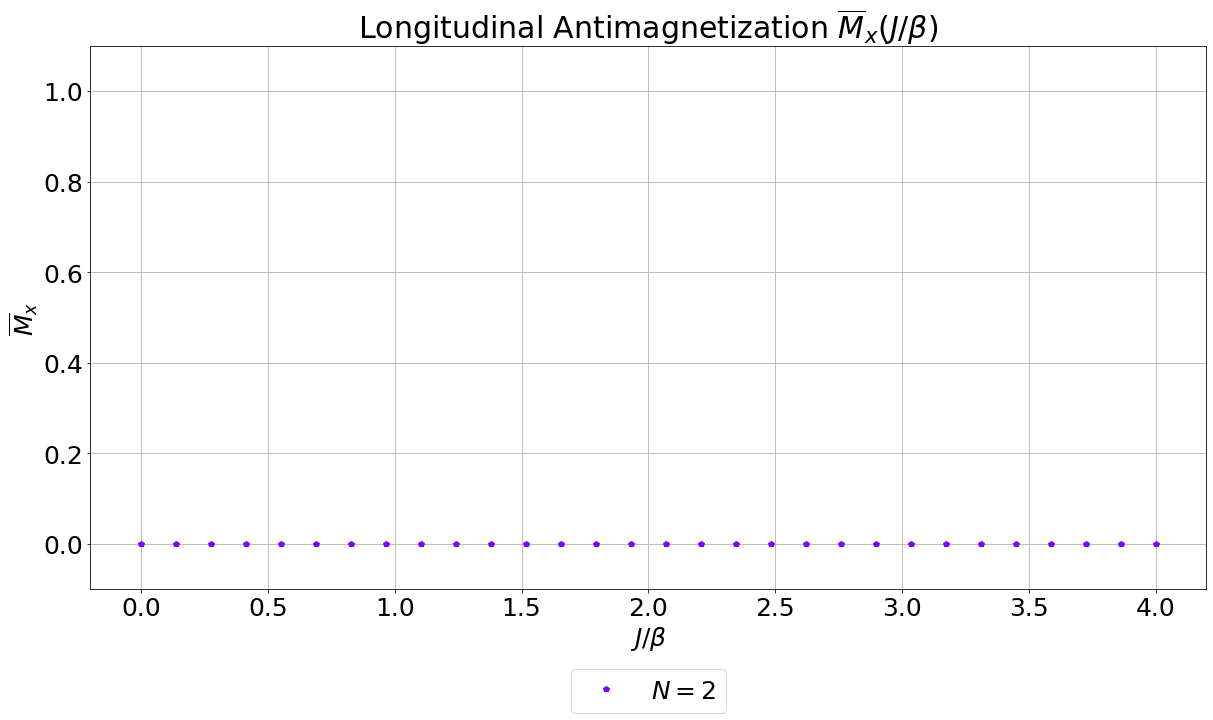

In [5]:
#Plot longitudinal antimagnetization vs J/beta
fig, ax = mp_canvas(10, 2/1)
plt.ylim(-0.1, 1.1)

ax.set_ylabel(r'$\overline{M}_x$')
ax.set_xlabel(r'$J/\beta$')
plt.title(r'Longitudinal Antimagnetization $\overline{M}_x(J/\beta)$')

color=iter(cm.rainbow(np.linspace(0,1,2*len(Ns))))
for i in range(len(Ns)):
    col=next(color)
    ax.plot(x1[i], np.abs(antimag[i]), 'p', label=r"$N=$" + f"{Ns[i]:d}", 
            color=col, linewidth=2)
plt.legend(bbox_to_anchor=[0.5, -0.25], loc='lower center', ncol=4)

#### Result from Cluster
The analysis was performed using the **Python**-Script _MPS_Program_long_antimagnet.py_.

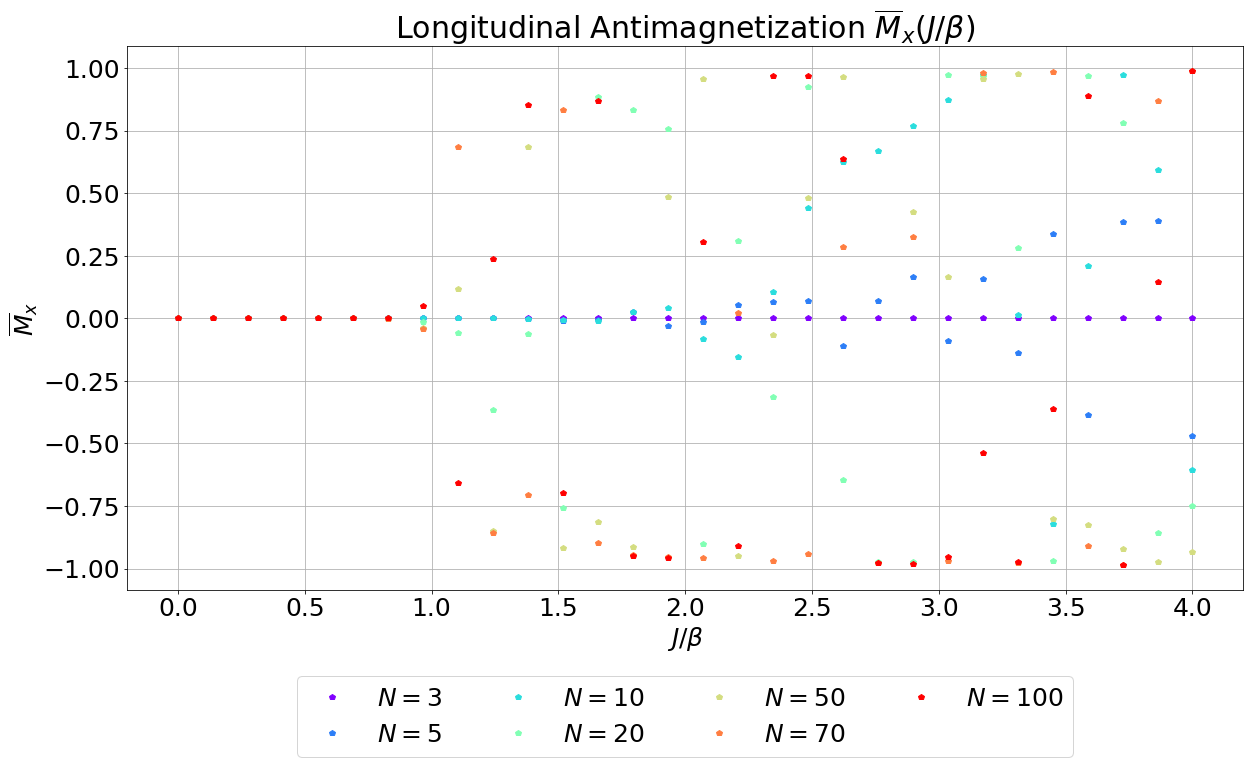

In [6]:
#Longitudinal Antimagnetization for different N
fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r"$J/\beta$")
ax.set_ylabel(r"$\overline{M}_x$")
plt.title(r'Longitudinal Antimagnetization $\overline{M}_x(J/\beta)$')

Ns = [3, 5, 10, 20, 50, 70, 100]
nplots = len(Ns)
xvec = []
yvec = []

for i in range(nplots):
    fn = f"../Data/observables/Long_Antimag_N={Ns[i]}_numerically_cor.txt"
    x, y = mp_loadtxtfile(fn) 
    xvec.append(x)
    yvec.append(y)

color=iter(cm.rainbow(np.linspace(0,1,len(Ns))))
for i in range(len(xvec)):
    col=next(color)
    ax.plot(xvec[i], (yvec[i]), 'p', label=r"$N=$"+str(Ns[i]), color=col, linewidth=2)  
plt.legend(bbox_to_anchor=[0.5, -0.33], loc='lower center', ncol=4)

#mp_savePDF("./results/long_antimag_N=20_10_5_3", fig)

### Transversal Magnetization

In [9]:
#calculate transversal magnetization
longMag = False

mag = []
x2 = []

for i in range(len(Ns)):
    print("N:", Ns[i])
    a, b = calcMagnBehaviour(Ns[i], longMag, J, beta, False)
    x2.append(a)
    mag.append(b) 

N: 2
Iteration steps: 19
Energy ground state:   -2.0000000000
Extrapolated ground state energy: -2.000000

Iteration steps: 78
Energy ground state:   -2.0047503442
Extrapolated ground state energy: -2.004751

Iteration steps: 91
Energy ground state:   -2.0189342732
Extrapolated ground state energy: -2.018935

Iteration steps: 96
Energy ground state:   -2.0423551203
Extrapolated ground state energy: -2.042358

Iteration steps: 102
Energy ground state:   -2.0746998689
Extrapolated ground state energy: -2.074705

Iteration steps: 103
Energy ground state:   -2.1155589352
Extrapolated ground state energy: -2.115567

Iteration steps: 107
Energy ground state:   -2.1644497846
Extrapolated ground state energy: -2.164463

Iteration steps: 106
Energy ground state:   -2.2208415329
Extrapolated ground state energy: -2.220861

Iteration steps: 112
Energy ground state:   -2.2841781102
Extrapolated ground state energy: -2.284206

Iteration steps: 111
Energy ground state:   -2.3538983094
Extrapolated g

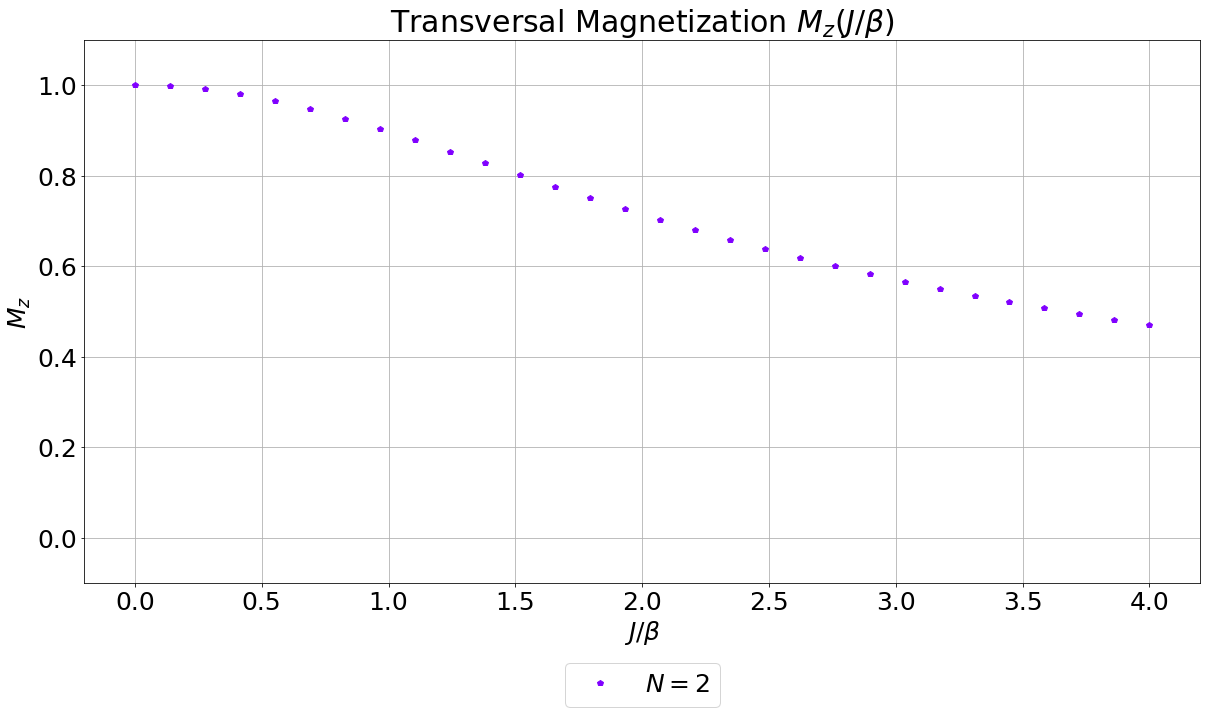

In [10]:
#Plot transversal magnetization vs J/beta
fig, ax = mp_canvas(10, 2/1)
plt.ylim(-0.1, 1.1)

ax.set_ylabel(r'$M_z$')
ax.set_xlabel(r'$J/\beta$')
plt.title(r'Transversal Magnetization $M_z(J/\beta)$')

color=iter(cm.rainbow(np.linspace(0,1,2*len(Ns))))
for i in range(len(Ns)):
    col=next(color)
    ax.plot(x2[i], mag[i], 'p', label=r"$N=$" + f"{Ns[i]:d}", 
            color=col, linewidth=2)
plt.legend(bbox_to_anchor=[0.5, -0.25], loc='lower center', ncol=4)

#### Result from Cluster
The analysis was performed using the **Python**-Script _MPS_Program_trans_magnet.py_.

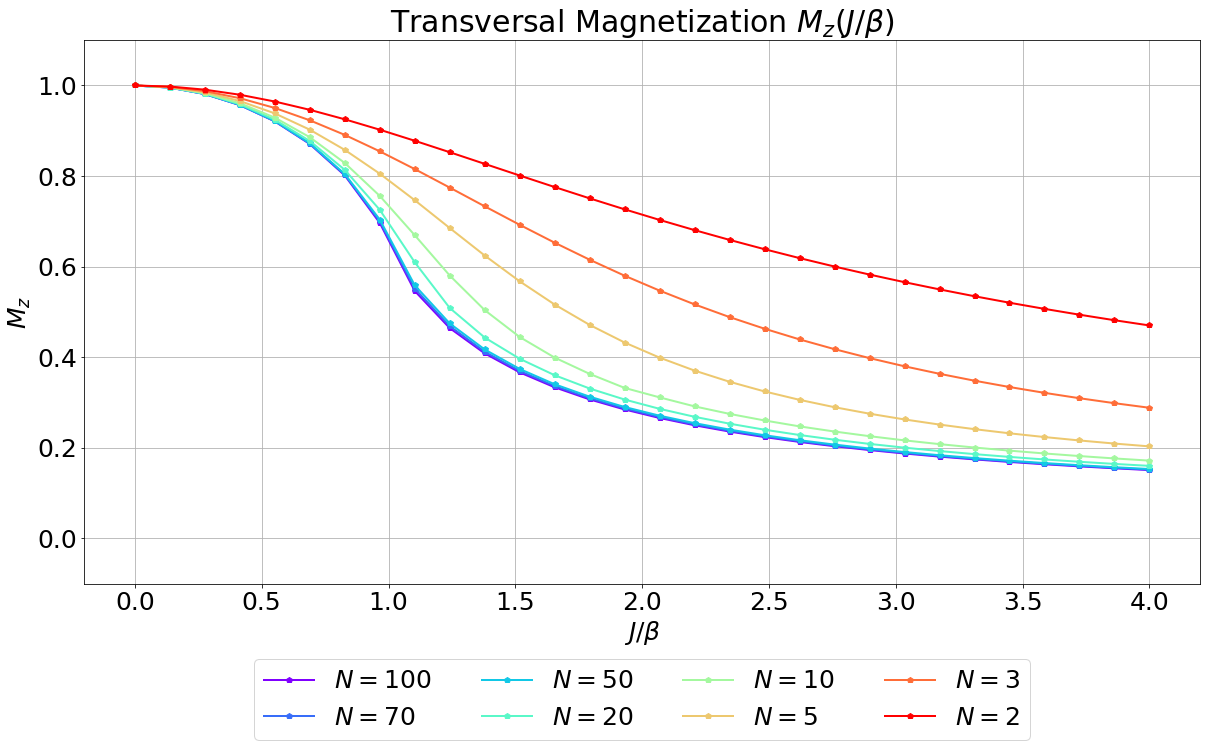

In [11]:
#Transversal Magnetization for different N
fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r"$J/\beta$")
ax.set_ylabel(r"$M_z$")
plt.title(r'Transversal Magnetization $M_z(J/\beta)$')
plt.ylim(-0.1, 1.1)

Ns = [100,70,50,20,10,5,3,2]
#Ns = [3,10,20,50,100]
nplots = len(Ns)
xvec = []
yvec = []
for i in range(nplots):
    fn = f"../Data/observables/Trans_Mag_N={Ns[i]}_numerically.txt"
    x, y = mp_loadtxtfile(fn) 
    xvec.append(x)
    yvec.append(y)

color=iter(cm.rainbow(np.linspace(0,1,len(Ns))))
for i in range(len(xvec)):
    col=next(color)
    ax.plot(xvec[i], yvec[i], 'p-', label=r"$N=$"+str(Ns[i]), color=col, linewidth=2)
plt.legend(bbox_to_anchor=[0.5, -0.31], loc='lower center', ncol=4)

#mp_savePDF("./results/trans_mag_all_N", fig)

## Part 2: Energy Gap $\Delta E$

In order to gain a better understanding, the gap between the ground state and the first excited state is studied depending on the particle number $N$ and the external magnetic field $J/\beta$. The energy gap is calculated using exact diagonalization of the Hamiltonian and extrapolated for larger particle numbers.

### $\Delta E(N)$

In [38]:
'''Parameter'''
Nmax = 11
n = np.arange(2,11,1)
J = np.array([1,2,3,4])
beta = np.full(len(J), 1)

In [39]:
#calculate energy gap between groundstate and first excited state
#using exact diagonalization
diff = []

for j in range(len(J)):
    val = []
    for i in range(len(n)):
        #get eigenstates/eigenvalue Hamiltonian
        tevals, tevecs = getEigenstate(n[i], J[j], beta[j])
        evals = tevals.numpy()
        evecs = tevecs.numpy()

        #sort in ascending order
        iid = evals.argsort()[::] 
        evals = evals[iid]
        evecs = evecs[:,iid]
        difference = evals[1].real-evals[0].real
        
        val.append(difference)
    
    diff.append(val)

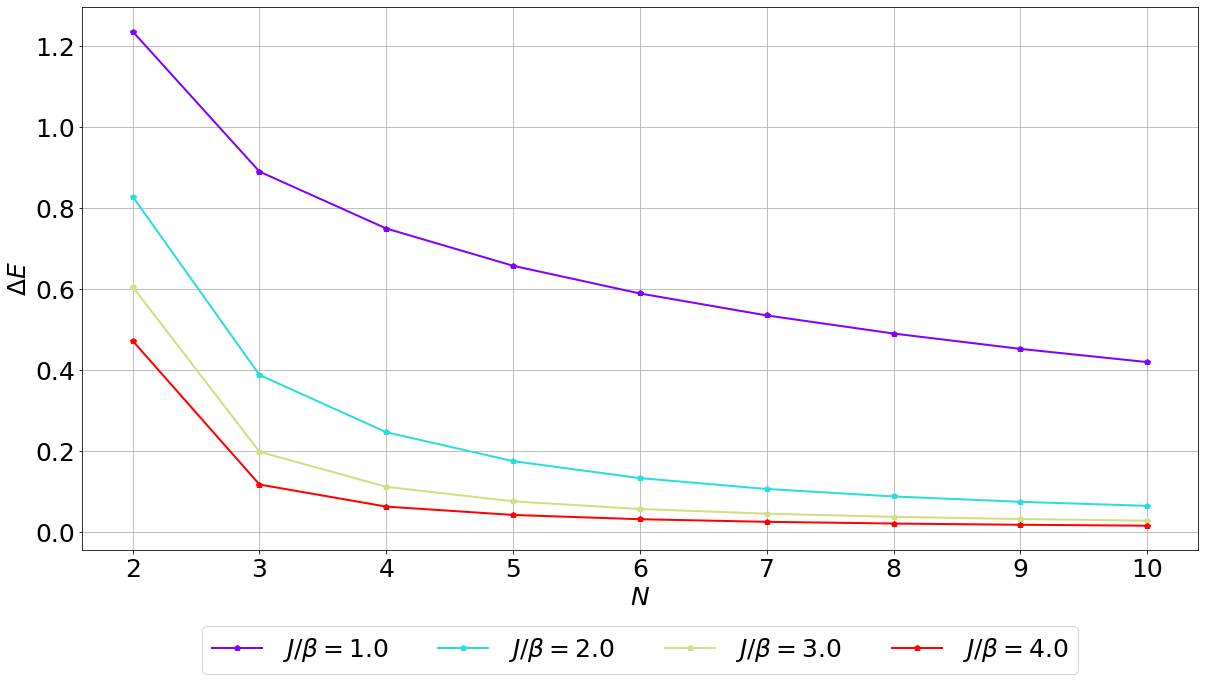

In [40]:
#plot energy gap depending on particle number N and J/beta
fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$\Delta E$")

color=iter(cm.rainbow(np.linspace(0,1,len(J))))
for i in range(len(J)):
    col=next(color)
    ax.plot(n, diff[i], 'p-', label=r"$J/\beta=$" + f"{J[i]:3.1f}", 
            color=col, linewidth=2)
plt.legend(bbox_to_anchor=[0.5, -0.25], loc='lower center', ncol=5)

Fit parameter: 
  0:     0.1732 +-     0.0518
  1:     1.9308 +-     0.0461
  2:     0.8725 +-     0.0820
Fit parameter: 
  0:     0.0334 +-     0.0053
  1:     3.0090 +-     0.0868
  2:     1.9237 +-     0.0449
Fit parameter: 
  0:     0.0286 +-     0.0036
  1:     4.2942 +-     0.2741
  2:     2.8988 +-     0.0932
Fit parameter: 
  0:     0.0198 +-     0.0027
  1:     5.5927 +-     0.5440
  2:     3.6302 +-     0.1411


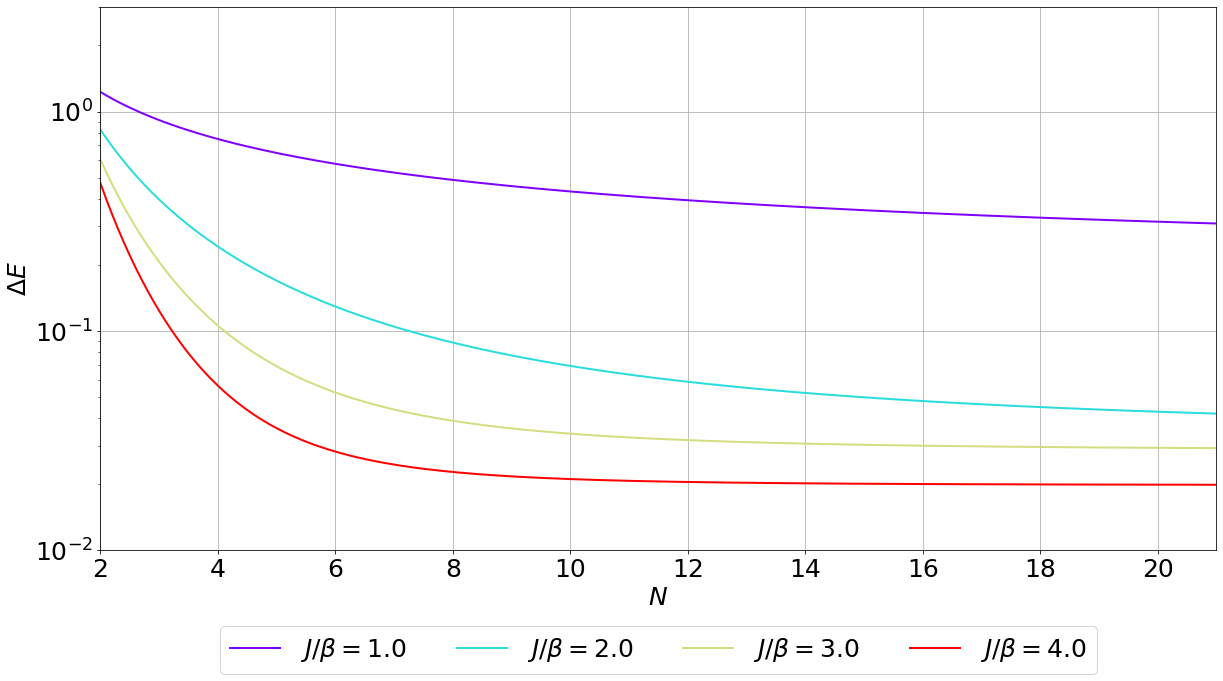

In [41]:
#extrapolation of Delta E(N)
xs = np.array([])
ys = np.array([])
zs = np.array([])

#fit
def f(x, *par):
    return(par[0]+par[1]*1/pow(x,par[2]))
    
#plot
fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$\Delta E$")

plt.yscale('log')
plt.ylim(0.01, 3)
plt.xticks(np.arange(2, 21, step=2))  
plt.xlim(2,21)

color=iter(cm.rainbow(np.linspace(0,1, len(J))))
for i in range(0, len(J), 1):
    x = n
    y = diff[i]
    #y errors 
    dy = np.linspace(5e-3,5e-3, len(y))

    #fit
    popt = [0, 1, 1] #start parameters
    popt, pcov = mp_curveFit(x, y, dy, f, popt)
    #mp_chisq(x, y, dy, f, popt)

    col=next(color)
    #mp_errorbar(ax, x, y, dy, lab='')
    #ax.plot(x, f(x, *popt), '-', label=r'fit to $\beta/J=$' + f"{b[i]:3.1f}", 
    #         color='red', linewidth=2)
    
    x_n = np.arange(2, 102, 0.1)
    ax.plot(x_n , f(x_n, *popt), '-', label=r'$J/\beta=$' + f"{J[i]:3.1f}", color=col, linewidth=2)
    xs = np.concatenate((xs, x_n), axis=0)
    ys = np.concatenate((ys, np.array(f(x_n, *popt))), axis=0)
    zs = np.concatenate((zs, np.full(len(x_n), J[i])), axis=0)
plt.legend(bbox_to_anchor=[0.5, -0.25], loc='lower center', ncol=5)

#mp_savePDF("./results/Delta_E_vs_N_2_20_new_log", fig)

### $\Delta E(J/\beta)$

In [42]:
'''Parameter'''
Nmax = 11
n1 = np.arange(2,11,1)
J1 = np.arange(0,2,0.05)
beta1 = np.full(len(J1), 1)

In [43]:
#calculate energy gap between groundstate and first excited state
#using exact diagonalization
diff1 = []

for j in range(len(n1)):
    val = []
    for i in range(len(J1)):
        #get eigenstates/eigenvalue Hamiltonian
        tevals, tevecs = getEigenstate(n1[j], J1[i], beta1[i])
        evals = tevals.numpy()
        evecs = tevecs.numpy()

        #sort in ascending order
        iid = evals.argsort()[::] 
        evals = evals[iid]
        evecs = evecs[:,iid]
        difference = evals[1].real-evals[0].real
        
        val.append(difference)
    
    diff1.append(val)

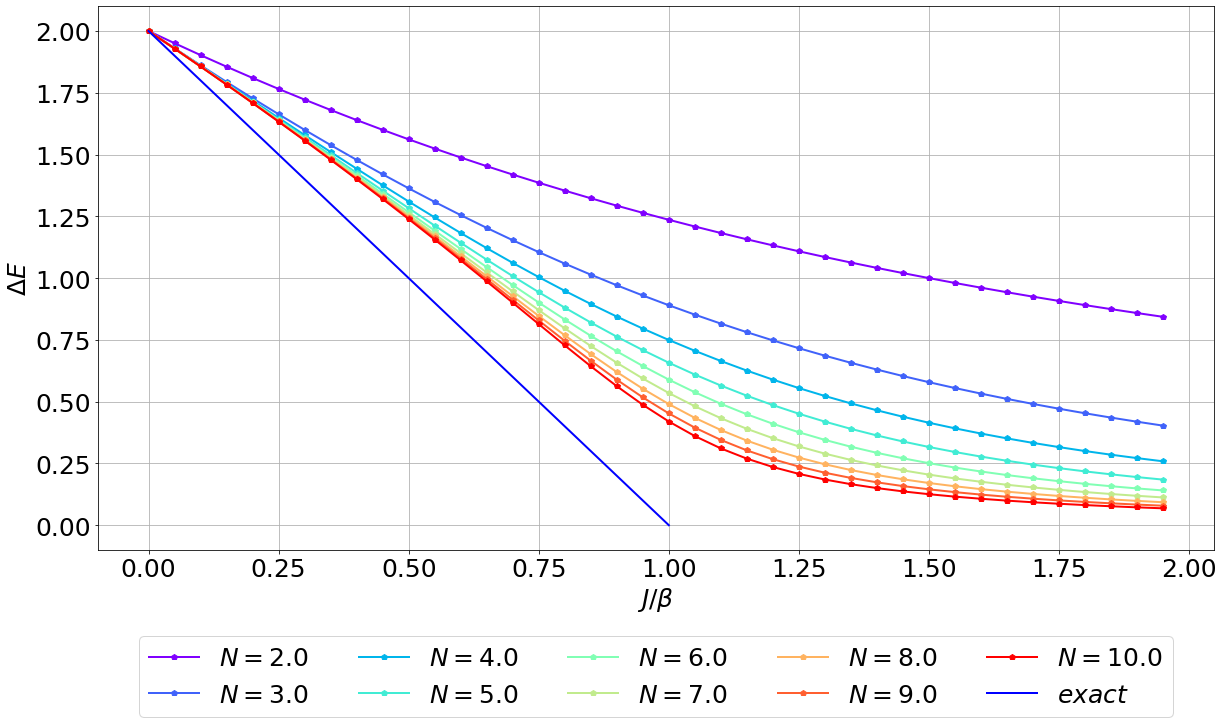

In [47]:
#plot energy gap depending on J/beta
fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r"$J/\beta$")
ax.set_ylabel(r"$\Delta E$")
#plt.xlim(-0.01, 1.01)

#theoretically expected functional dependence of energy gap from couplings
def Delta(J, beta):
    return 2*np.abs(beta)*np.abs((1-J/beta))

color=iter(cm.rainbow(np.linspace(0,1,len(n1))))
for i in range(len(n1)):
    col=next(color)
    ax.plot(J1, diff1[i], 'p-', label=r"$N=$" + f"{n[i]:3.1f}", color=col, linewidth=2)

ax.plot(J1[0:21], Delta(J1[0:21], beta1[0:21]), '-', label=r"$exact$",
        color="blue", linewidth=2)
plt.legend(bbox_to_anchor=[0.5, -0.33], loc='lower center', ncol=5)
#mp_savePDF("./results/Delta_E_vs_Jbeta_sel", fig)

### Part 3: One-Point Correlation Function

In [49]:
'''Parameter'''
N = 3
J = np.linspace(0, 4, 30)
beta = np.full(len(J), 1)

In [50]:
#calculated expectation value one-point correlation function for
#mps ground state
corr = []
x = []

rho = one_point_corr_mpo(N)

#ground state from TEBD
dt0 = 0.4
eps_dt = 0.09
dt_red = 0.8
eps_tol = 1e-3
phys_gap = 1e-3
eps_trunc = 1e-4
Dmax = 10
bdim_start = 2

for i in range(len(J)):
    conf = ImagiTime_config(N=N, J=J[i], beta=beta[i], dt0=dt0, eps_trunc=eps_trunc, 
                            Dmax=Dmax, eps_dt=eps_dt, dt_red=dt_red, eps_tol=eps_tol, 
                            phys_gap=phys_gap, bdim_start=bdim_start)
    now = datetime.now().strftime("%y%m%d%H%M%S")
    E0, E, groundstate = getGroundstate(conf, now)
    x.append(J[i]/beta[i])
    corr.append(get_exp_val_mpo(groundstate, rho)/(-1)/(N-1))

Iteration steps: 18
Energy ground state:   -2.9999999999
Extrapolated ground state energy: -3.000000

Iteration steps: 80
Energy ground state:   -3.0095119118
Extrapolated ground state energy: -3.009512

Iteration steps: 93
Energy ground state:   -3.0380443286
Extrapolated ground state energy: -3.038047

Iteration steps: 101
Energy ground state:   -3.0855691963
Extrapolated ground state energy: -3.085575

Iteration steps: 108
Energy ground state:   -3.1519843855
Extrapolated ground state energy: -3.151996

Iteration steps: 118
Energy ground state:   -3.2370470022
Extrapolated ground state energy: -3.237067

Iteration steps: 123
Energy ground state:   -3.3403092146
Extrapolated ground state energy: -3.340343

Iteration steps: 127
Energy ground state:   -3.4610768257
Extrapolated ground state energy: -3.461131

Iteration steps: 131
Energy ground state:   -3.5984042976
Extrapolated ground state energy: -3.598486

Iteration steps: 135
Energy ground state:   -3.7511284540
Extrapolated groun

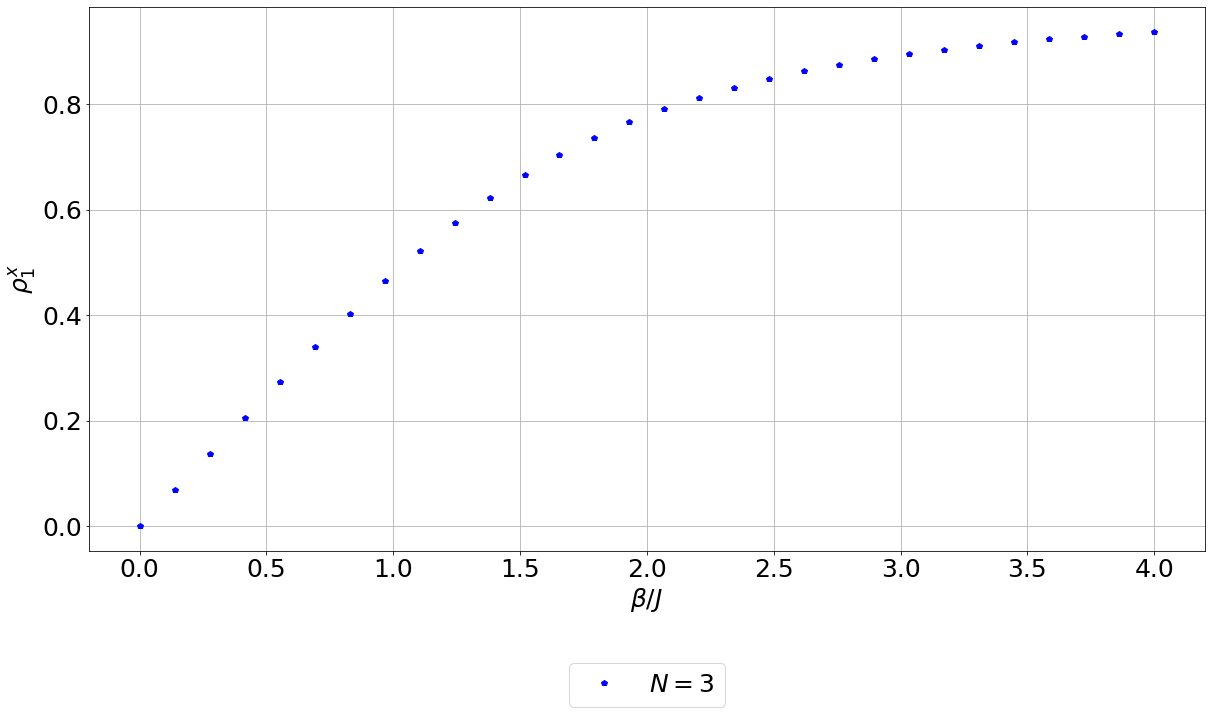

In [54]:
#plot results
fig, ax = mp_canvas(10, 2/1)
ax.set_ylabel(r'$\rho^x_1$')
ax.set_xlabel(r'$\beta/J$')
ax.plot(x, corr, 'p', label=r"$N=$" + f"{N:d}", color="blue", linewidth=2)
plt.legend(bbox_to_anchor=[0.5, -0.31], loc='lower center', ncol=3)

#### Result from Cluster
The analysis was performed using the **Python**-Script _MPS_Program_one_point_corr.py_.

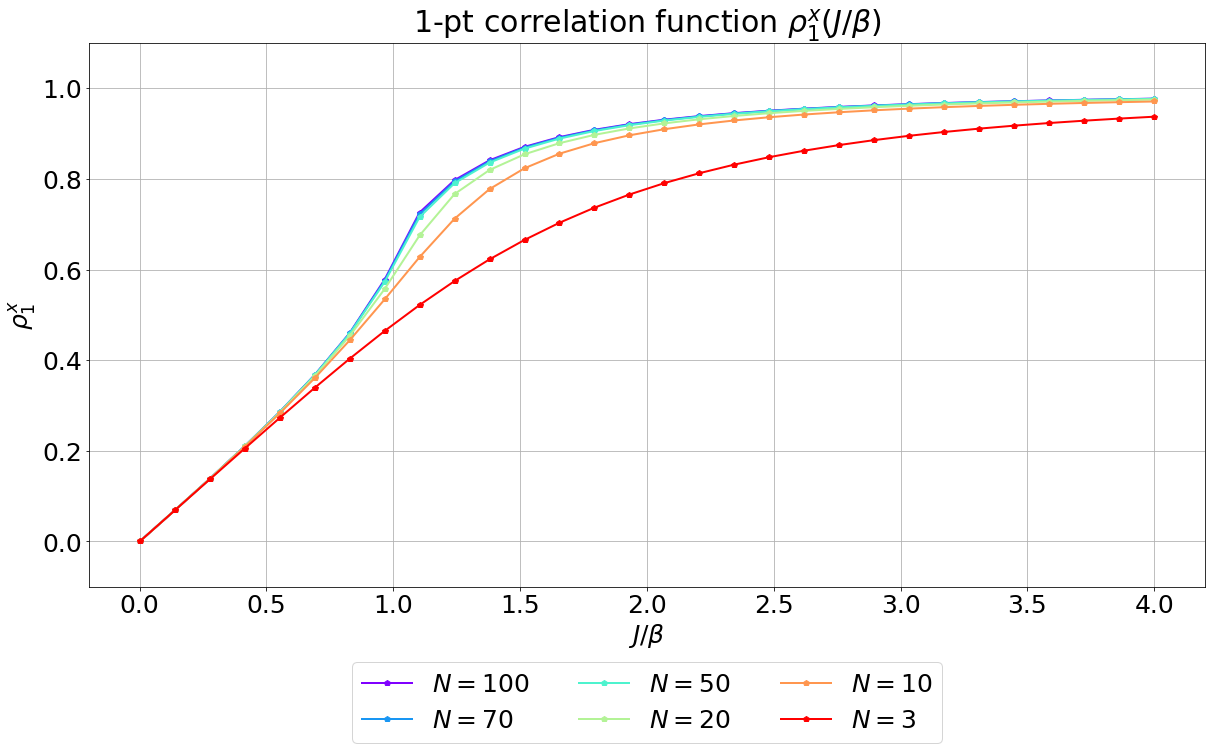

In [12]:
#One-point correlation function expectation value for different N
fig, ax = mp_canvas(10, 2/1)
ax.set_ylabel(r'$\rho^x_1$')
ax.set_xlabel(r'$J/\beta$')
plt.title(r'1-pt correlation function $\rho^x_1(J/\beta)$')
plt.ylim(-0.1, 1.1)

Nns = [100,70,50,20,10,3]
nplots = len(Nns)
xvec = []
yvec = []

for i in range(nplots):
    fn = f"../Data/observables/corr_func_N={Nns[i]}.txt"
    x, y = mp_loadtxtfile(fn) 
    xvec.append(x)
    yvec.append(y)

color=iter(cm.rainbow(np.linspace(0,1,len(Nns))))
for i in range(len(xvec)):
    col=next(color)
    ax.plot(xvec[i], yvec[i], 'p-', label=r"$N=$"+str(Nns[i]), color=col, linewidth=2) 
plt.legend(bbox_to_anchor=[0.5, -0.31], loc='lower center', ncol=3)

#mp_savePDF("./results/corr_func_all_N", fig)